# Venkatalakshmi Bandaru
#Gripjune21
# Task -8 : Timeline analysis -covid19

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [20]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')

In [21]:
country_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [22]:
country_df.isnull().sum() # no null values are present

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [23]:
country_df = country_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
country_df.head()
# deleting sno , ConfirmedIndianNational,ConfirmedForeignNational

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [24]:
country_df['Active'] = country_df['Confirmed'] - country_df['Cured'] - country_df['Deaths']
country_df.tail() 
# calculating active cases in our country

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
15801,2021-06-08,8:00 AM,Telangana,564303,3394,593103,25406
15802,2021-06-08,8:00 AM,Tripura,49579,572,56169,6018
15803,2021-06-08,8:00 AM,Uttarakhand,313566,6731,334419,14122
15804,2021-06-08,8:00 AM,Uttar Pradesh,1662069,21333,1699083,15681
15805,2021-06-08,8:00 AM,West Bengal,1388771,16362,1432019,26886


In [25]:
country_df['Date'] = pd.to_datetime(country_df['Date'])
#convert to date and time format

In [26]:
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


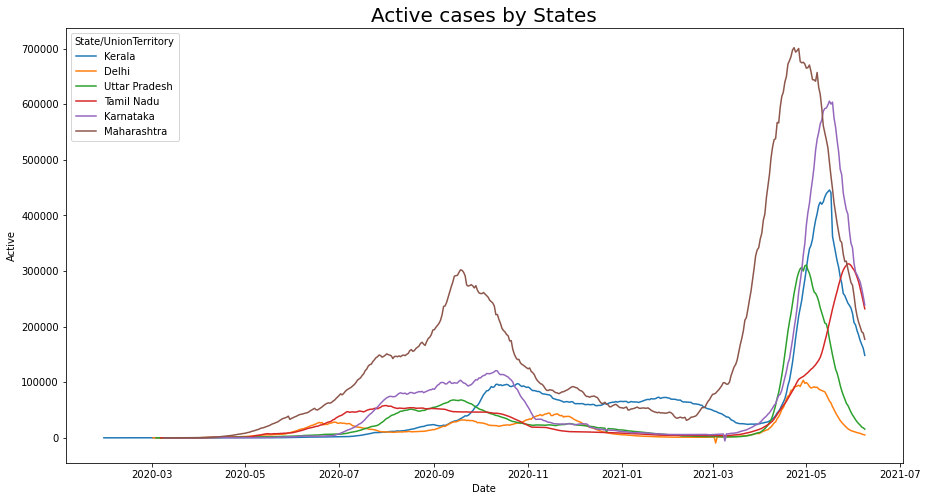

In [27]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()
# Active cases in top 6 states during the period of time

In [28]:
india_cases = country_df[country_df['Date'] == country_df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

In [29]:
india_cases.head()

,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8:00 AM,6912,123,7131,96
Andhra Pradesh,8:00 AM,1637149,11552,1763211,114510
Arunachal Pradesh,8:00 AM,26131,125,29696,3440
Assam,8:00 AM,385032,3695,438746,50019
Bihar,8:00 AM,700224,5424,713879,8231


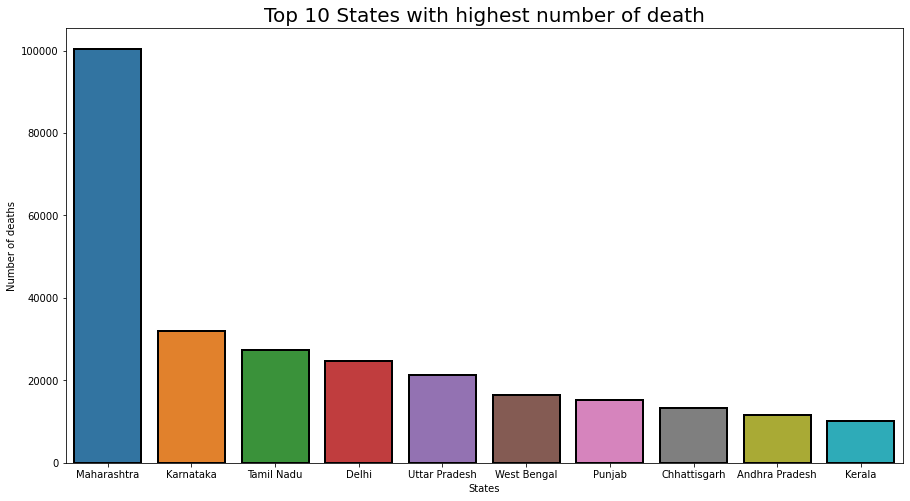

In [30]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

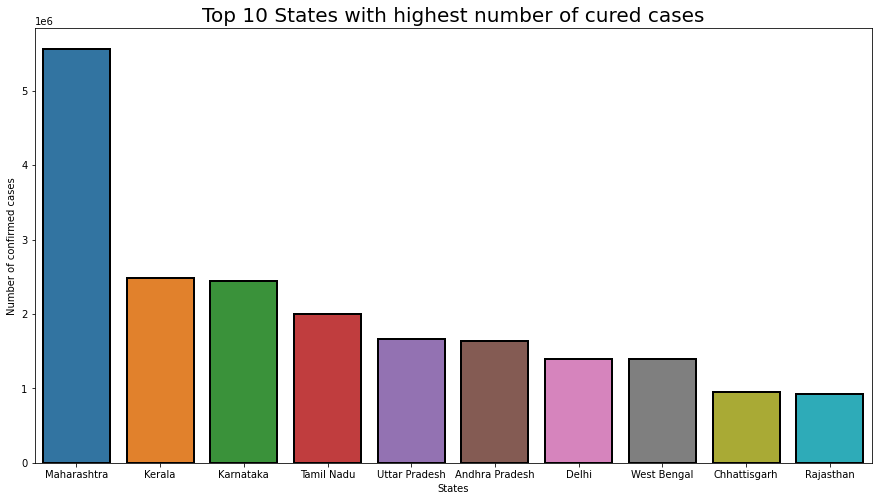

In [31]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [32]:
vaccination = pd.read_csv(r"covid_vaccine_statewise.csv")

In [33]:
vaccination.head(20)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [34]:
vaccination.shape

(5328, 18)

In [35]:
vaccination.isnull().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated             40
Total Sessions Conducted                 40
Total Sites                              40
First Dose Administered                  40
Second Dose Administered                 40
Male(Individuals Vaccinated)             40
Female(Individuals Vaccinated)           40
Transgender(Individuals Vaccinated)      40
Total Covaxin Administered               40
Total CoviShield Administered            40
Total Sputnik V Administered           4666
AEFI                                   2221
18-45 years (Age)                      2226
45-60 years (Age)                      2225
60+ years (Age)                        2225
Total Doses Administered                 37
dtype: int64

In [36]:
vaccination = vaccination.drop(['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis=1)
# removing columns having most null values

In [37]:
vaccination.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


In [38]:
male = vaccination["Male(Individuals Vaccinated)"].sum() 
female = vaccination["Female(Individuals Vaccinated)"].sum()  
trans = vaccination["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [39]:
Covaxin = vaccination["Total Covaxin Administered"].sum() 
Covishield = vaccination["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [40]:
v=vaccination[vaccination.State!='India']
print(v.index)

Int64Index([ 144,  145,  146,  147,  148,  149,  150,  151,  152,  153,
            ...
            5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327],
           dtype='int64', length=5184)


In [41]:
v.head(5)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Doses Administered
144,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
145,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
146,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,42.0
147,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,89.0
148,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,124.0


In [42]:
v.rename(columns = {"Total Individuals Vaccinated": "Total"}, 
          inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
States_grouped=v.groupby('State')['Total'].sum().to_frame('Total')
States_grouped=States_grouped.sort_values('Total',ascending=False).head(5)
States_grouped

,Total
State,
Maharashtra,1.036216e+09
Rajasthan,8.529093e+08
Uttar Pradesh,8.506090e+08
Gujarat,7.976807e+08
West Bengal,6.839649e+08


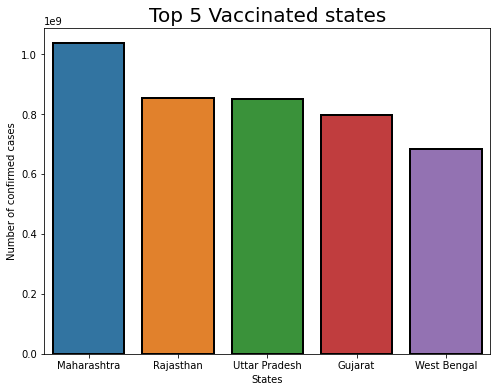

In [44]:
fig=plt.figure(figsize=(8,6))
plt.title("Top 5 Vaccinated states", size=20)
plt.xlabel("states")
plt.ylabel("Vaccination number")
x=sns.barplot(data=States_grouped.iloc[:10],y=States_grouped.Total,x=States_grouped.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [45]:
Doses = vaccination["Total Doses Administered"].sum() 
Vaccinated = vaccination["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [46]:
df_Karnataka=vaccination[vaccination['State']=='Karnataka']

In [47]:
Doses = df_Karnataka["Total Doses Administered"].sum() 
Vaccinated = df_Karnataka["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

# THANK YOU